Numpy also called Numerical Python is an amazing library open-source Python library for data manipulation and scientific computing. It is used in the domain of linear algebra, Fourier transforms, matrices, and the data science field. which is used.

we must be wondering that NumPy is also used for Image Processing. we must have known about Image processing Libraries such as OpenCV, Python Image Library(PIL), Scikit-Image, and many more.The fundamental idea is that we know images are made up of NumPy ndarrays. So we can manipulate these arrays and play with images. 

## Installation of Required Libraries

In [1]:
# installation of required Libraries
#pip install numpy
#pip install matplotlib
!pip install Pillow

## Importing the Required Libraries

In [11]:
#importing all the required libraries
import numpy as np
import pandas as pd
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

To open an image, we are using the open() method from the PIL Image module. Similarly, we can use the matplotlib library to read and show images.

1)imread() – to read the images

2)imshow() – to display the images

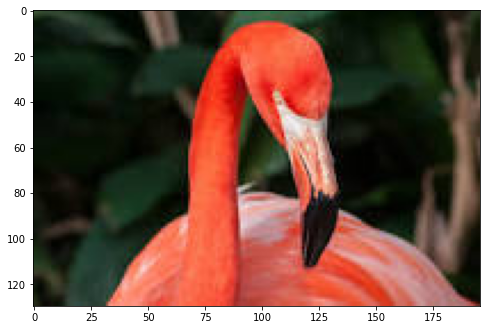

In [2]:
img = np.array(Image.open('duck.jpeg'))#open the image
plt.figure(figsize=(8,8)) #scale the image height and width
plt.imshow(img)#display image
plt.show()#show the image

In [5]:
# check the image dimension
print("Dimension of image:",img.ndim)
# check shape of the image
print("Shape of Image:", img.shape)
# check data type of the image
print("Dtype:",img.dtype)
#pixel value of the [R,G,B]
print("Pixel value of the R,G,B:",img[20, 20])
#Minimum pixel value of the channel B
print("Minimum pixel value of the channel B;", img[:,:,2].min())

Dimension of image: 3
Shape of Image: (130, 196, 3)
Dtype: uint8
Pixel value of the R,G,B: [18 39 22]
Minimum pixel value of the channel B; 0


### Saving ndarray as Image

In [7]:
# To save a ndarray as an image, we are using the img.save()method
path = "duck.jpeg"
pil_img = Image.fromarray(img)
pil_img.save(path) #Rotating an image

#### Image.rotate() method used for rotate the image using PIL library

### Algorithm: image(ndarray) -> transpose -> mirror image across y axis (middle column)

Text(0.5, 1.0, 'Rotated')

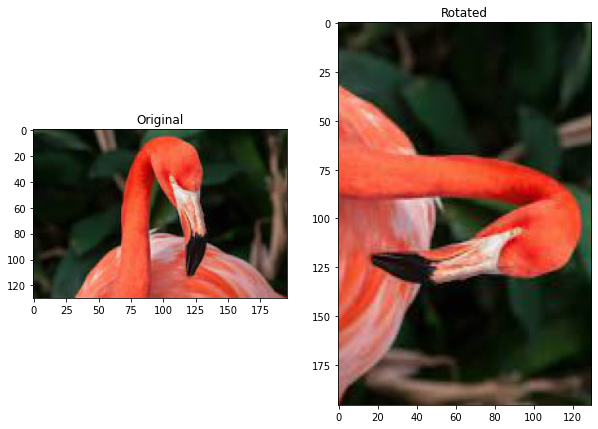

In [29]:
# we are rotated image without using the pil lib.
# below check the code we will rotate the image in the 90 degree ("Clockwise")

degrees = 90
img  = np.array(Image.open('duck.jpeg'))

# Converting image into the grayscale
#img = img.sum(2)/(255*3)

fig = plt.figure(figsize=(10,10))

fig.add_subplot(1,2,1)

plt.imshow(img)

plt.title("Original")

img1 = img.copy()

for _ in range(degrees//90):
    img1 = img1.transpose(1,0,2)
    for j in range(0, img1.shape[1]//2):
        c = img1[:,j,:].copy()
        img1[:,j,:] = img1[: , img1.shape[1]-j-1, :]
        img1[ : , img1.shape[1]-j-1, :] = c
fig.add_subplot(1,2,2)
plt.imshow(img1)
plt.title("Rotated")


In [30]:
print("dimension of the image:", img1.ndim)
print("shape of the image:", img1.shape)
print("Pixle value of the images:", img1[20,20])
print("data types of the image:", img1.dtype)
print("Minimum pixle value of image channel of the B", img1[:,:,2].min())

dimension of the image: 3
shape of the image: (196, 130, 3)
Pixle value of the images: [42 66 52]
data types of the image: uint8
Minimum pixle value of image channel of the B 0


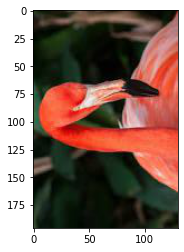

In [31]:
# below code we used for image anticlock wise for image rotate

plt.imshow(np.rot90(img))

## Negative of an Image

Converting color image to negative image 

We want to perform only three steps for each pixle of the images

1.] First , get the RGB values of the pixle

2.] Second, Calculate the new RGB values using R = 255-R, G = 255-G, B = 255-B.

3.] Finally , save the new RGB values in the pixle

Text(0.5, 1.0, 'Negative of RGB Image')

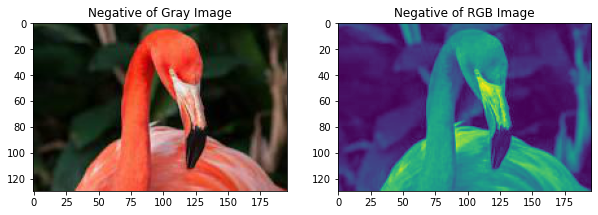

In [56]:
# below code to convert original image to negative image



fig = plt.figure(figsize = (10,10))

img_grey = 255*3 - img_grey # 255 * 3 because we added along channel axis previously

fig.add_subplot(1,2,1)

plt.imshow(img_grey)

plt.title("Negative of Gray Image")


img = 255 - img

fig.add_subplot(1,2,2)

plt.imshow(img)

plt.title("Negative of RGB Image")





## Padding Black Spaces

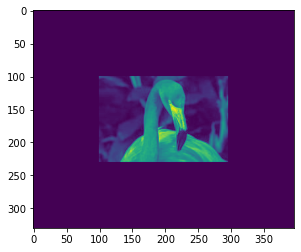

In [58]:
# To add black padding around an image , use the below code:
img = np.array(Image.open('duck.jpeg'))
img_grey = img.sum(2) / (255*3)
img1 = img_grey.copy()
img1 = np.pad(img1 , ((100,100),(100,100)),mode = 'constant')
plt.imshow(img1)

### Visualizing the RGB Channels

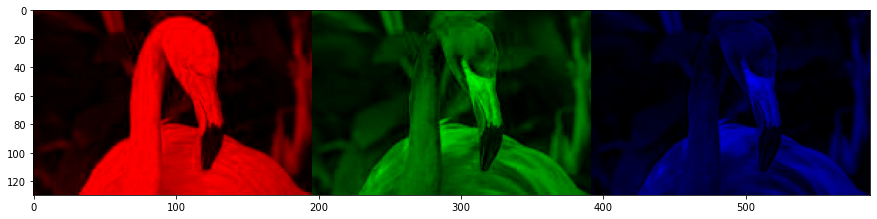

In [59]:
#To split the image into each RGB colors, we see below code:
img = np.array(Image.open('duck.jpeg'))
img_R, img_G, img_B = img.copy(), img.copy(), img.copy()
img_R[:, :, (1,2)]=0
img_G[:, :, (0,2)]=0
img_B[:, :, (0,1)]=0
img_rgb = np.concatenate((img_R, img_G, img_B), axis=1)
plt.figure(figsize=(15,15))
plt.imshow(img_rgb)

## Colour Reduction

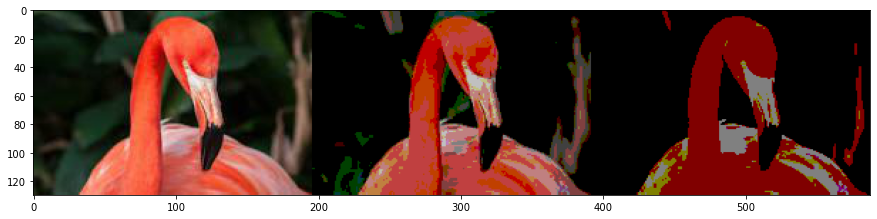

In [61]:
# we can reduce the color intensity depends on our needs. 
#Check the below code for color reduction

img = np.array(Image.open("duck.jpeg"))

#Making the Pixel values discreate by first division by // which is given int and multiply by the same factor

img_0 = (img // 64)  * 64
img_1 = (img // 128) * 128
img_all = np.concatenate((img, img_0,img_1), axis=1)

plt.figure(figsize=(15,15))
plt.imshow(img_all)

## Trim Image

Text(0.5, 1.0, 'Trimmed')

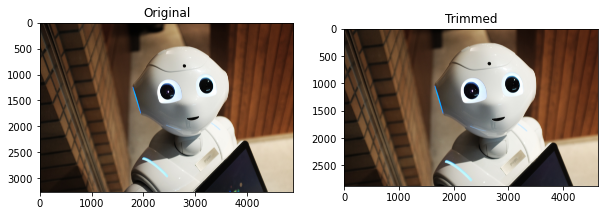

In [99]:
# we can trim an image in Numpy using Array Slicing.

img = np.array(Image.open('pexels-alex-knight-2599244.jpg'))
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')

img0 = img[196:-196, 130:-130, :]
fig.add_subplot(1, 2,2)
plt.imshow(img0)
plt.title('Trimmed')

## Pasting With Slice 

Text(0.5, 1.0, 'Pasted with slice')

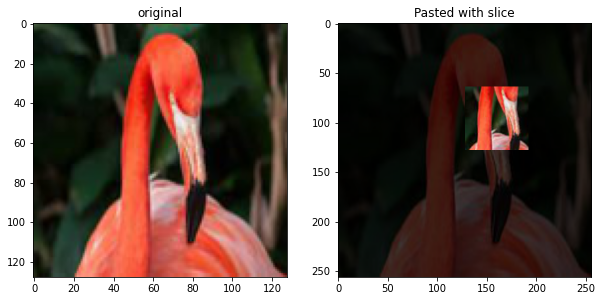

In [100]:
# we can paste a slice of an image onto another image. 
# check the below code in python for pasting a slice of the image.

src = np.array(Image.open('duck.jpeg').resize((128,128)))
dst = np.array(Image.open('duck.jpeg').resize((256,256))) // 4

dst_copy = dst.copy()
dst_copy[64:128, 128:192] = src[32:96, 32:96]

fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)

plt.imshow(src)
plt.title('original')

fig.add_subplot(1,2,2)
plt.imshow(dst_copy)
plt.title("Pasted with slice")
               

## Binarize Image

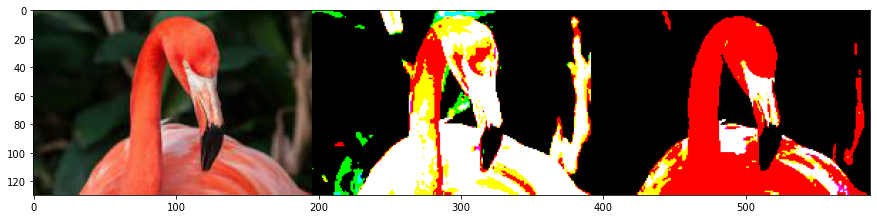

In [101]:
# We can also binarize an Image using Numpy. Check the below code to binarize an image.
img = np.array(Image.open("duck.jpeg"))
img_64 = (img > 64) * 255
img_128 = (img > 128)* 255
fig = plt.figure(figsize = (15,15))
img_all = np.concatenate((img, img_64, img_128),axis=1)
plt.imshow(img_all)

##  Cropping Image

In [102]:
#Cropping an image changes its size by removing pixels from its edges. 

import numpy as np
from PIL import Image

img_in = Image.open('duck.jpeg')
array = np.array(img_in)

cropped_array = array[50:350, 150:450, :]

img_out = Image.fromarray(cropped_array)
img_out.save('cropped-duck.jpeg')

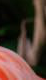

In [105]:
img_out

In [103]:
img_in = Image.open('duck.jpeg')
array = np.array(img_in)

In [106]:
img_out = Image.fromarray(cropped_array)
img_out.save('cropped-duck.jpeg')

## Padding

In [117]:
img_in = Image.open('boat.jpg')
array = np.array(img_in)
padded_array = np.empty([600, 700, 3], dtype=np.uint8)
padded_array[:,:] = np.array([0,64,128])
padded_array[50:450, 80:680] = array
img_out = Image.fromarray(padded_array)
img_out.save('padding-boat.jpg')

In [118]:
padded_array = np.pad(array, ((50,150),(80,20), (0,0)))


In [120]:
padded_array = np.pad(array, ((50,150),(80,20), (0,0)), constant_values = (128,))

In [121]:
padded_array = np.pad(array, ((50,150), (80,20), (0,0)), mode='wrap')

## Flipping

In [127]:
# flip image horizontally and vertically

# Horizontally flipping :- called left to right flipping creates a mirror image of the original

# Negative indexing in numpy : flipped_array = array[:, ::-1]

# Remember the that ::-1 creates a full slice but with a step of -1, 

#in other words it reverse the array on the axis, 

#reverse order of the row of the images, resulting in the horizontal flip.

# Numpy has a function fliplr the flips an array on its 

img_in = Image.open("duck.jpeg")

array = np.array(img_in)

flipped_array = np.fliplr(array)

img_out = Image.fromarray(flipped_array)

img_out.save('fliph-duck.jpeg')

In [128]:
img_out.show()

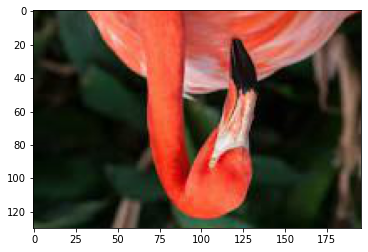

In [130]:
img = np.array(Image.open("duck.jpeg"))
img1 = img.copy()
for i in range(img1.shape[0]//2):
    c = img1[i, : , :].copy()
    img1[i,:,:] = img1[img1.shape[0]-i-1,:,:]
    img1[img1.shape[0] - i -1, :, :] = c
    plt.imshow(img1)


## An Alternate way to Flip an Image

1)np.flipud() : [up/down]flips over x-axis

2)np.fliplr() : [left/right]flips over y_axis

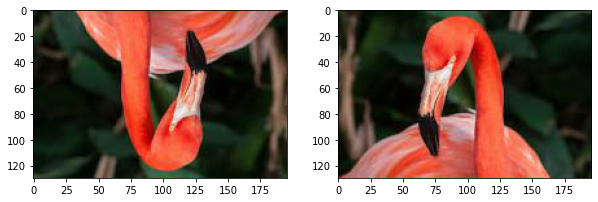

In [131]:
img = np.array(Image.open("duck.jpeg"))
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
plt.imshow(np.flipud(img))
fig.add_subplot(1,2,2)
plt.imshow(np.fliplr(img))

## Blending Two Images

uint8


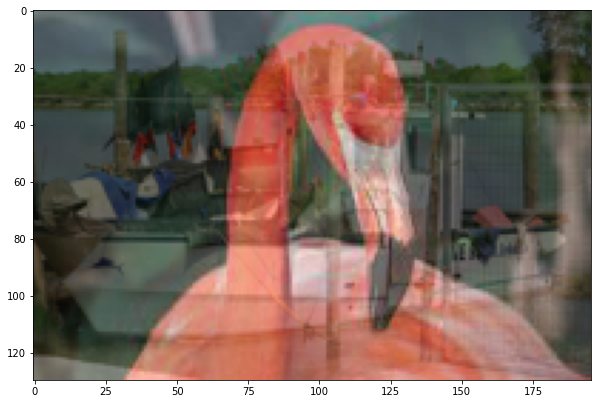

In [133]:
# if you want to blend two images
img = np.array(Image.open('duck.jpeg'))
img0 = np.array(Image.open('boat.jpg').resize(img.shape[1::-1])) # resize takes 2 arguments (WIDTH, HEIGHT)
print(img.dtype)

#uint8

dst = (img * 0.6 + img0 * 0.4).astype(np.uint8) # Blending them in

plt.figure(figsize=(10,10))
plt.imshow(dst)

## Masking Images

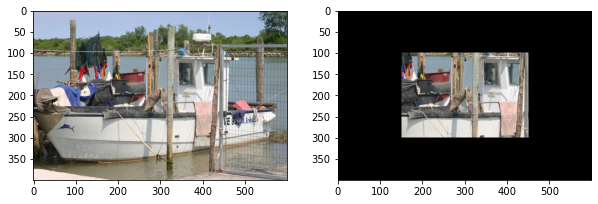

In [9]:

img = np.array(Image.open('boat.jpg'))
ones = np.ones((img.shape[0] //2, img.shape[1] //2,3))
zeros = np.zeros(((img.shape[0]//4, img.shape[1] // 4,3)))
zeros_mid = np.zeros(((img.shape[0]//2, img.shape[1] //4,3)))
up = np.concatenate((zeros, zeros,zeros,zeros),axis=1)
middle = np.concatenate((zeros_mid, ones,zeros_mid),axis=1)
down = np.concatenate((zeros,zeros,zeros,zeros),axis=1)
mask = np.concatenate((up,middle, down),axis=0)
mask = mask/255
img0 = mask*img
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
plt.imshow(img)
fig.add_subplot(1,2,2)
plt.imshow(img)
plt.imshow(img0)

### Histogram for pixel Intensity

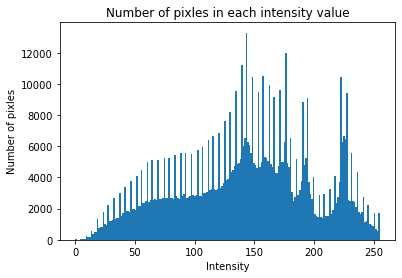

In [10]:
# histogram using the hist() function 

img = np.array(Image.open('boat.jpg'))
img_flat = img.flatten()
plt.hist(img_flat, bins=200, range=[0,255])
plt.title("Number of pixles in each intensity value")
plt.xlabel("Intensity")
plt.ylabel("Number of pixles")
plt.show()

### Image Compression

In [1]:
#import Libararies

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread 

In [2]:
image_raw = imread("boat.jpg")
print(image_raw.shape)

(400, 600, 3)


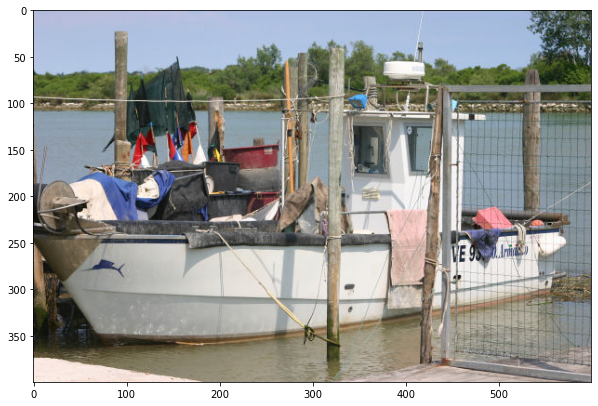

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(image_raw)

In [6]:
#show the new shape of the image
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

(400, 600)


In [9]:
#Show the max value at the any point. 1.0 = Black , 0.0 = white

image_bw = image_sum/image_sum.max()
print(image_bw)

[[0.76862745 0.76862745 0.76339869 ... 0.2496732  0.31633987 0.23398693]
 [0.76862745 0.76862745 0.76339869 ... 0.21568627 0.16339869 0.22614379]
 [0.76862745 0.76862745 0.76732026 ... 0.18169935 0.19215686 0.22614379]
 ...
 [0.92679739 0.93071895 0.93464052 ... 0.54117647 0.55294118 0.54509804]
 [0.92026144 0.92418301 0.92810458 ... 0.58823529 0.59607843 0.58823529]
 [0.93856209 0.93856209 0.93464052 ... 0.54117647 0.56470588 0.56078431]]


### Calculating Expalined Variance

In [11]:
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA 

In [12]:
pca = PCA()
pca.fit(image_bw)

PCA()

In [13]:
#Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_)*100

#How many PCs explain 95% of the variance
k = np.argmax(var_cumu>95)
print("Number of components explained 95% variance: "+ str(k))

Number of components explained 95% variance: 0


In [ ]:
plt.figure(figsize=[10,5])
plt.title("Cumulative Explained Variance expli")